<a href="https://colab.research.google.com/github/haan-doobey/buckley_leverett_simulation/blob/main/Buckley_Leverett_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Buckley-Leverett 1D Simulation using Finite Difference (Forward-Backward Scheme)

In [1]:
!git clone https://github.com/yohanesnuwara/pyreservoir

Cloning into 'pyreservoir'...
remote: Enumerating objects: 951, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 951 (delta 16), reused 28 (delta 10), pack-reused 915 (from 1)
Receiving objects: 100% (951/951), 24.45 MiB | 29.98 MiB/s, done.
Resolving deltas: 100% (505/505), done.


In [3]:
import seaborn as sns


In [6]:
import numpy
from matplotlib import pyplot
import pandas as pd
from scipy import interpolate

import sys
sys.path.append("/content/pyreservoir/fluid_flow")
from relperm import interpolate_relperm
from twophase import buckley_leverett1d

pyplot.style.use('seaborn-v0_8')

Relative permeability data

      Sw    krw    kro
0   0.20  0.000  0.600
1   0.25  0.002  0.500
2   0.30  0.020  0.400
3   0.35  0.040  0.300
4   0.40  0.070  0.230
5   0.45  0.110  0.170
6   0.50  0.150  0.120
7   0.55  0.220  0.080
8   0.60  0.300  0.050
9   0.65  0.400  0.030
10  0.70  0.500  0.020
11  0.75  0.600  0.010
12  0.80  0.700  0.005
13  0.85  0.800  0.000


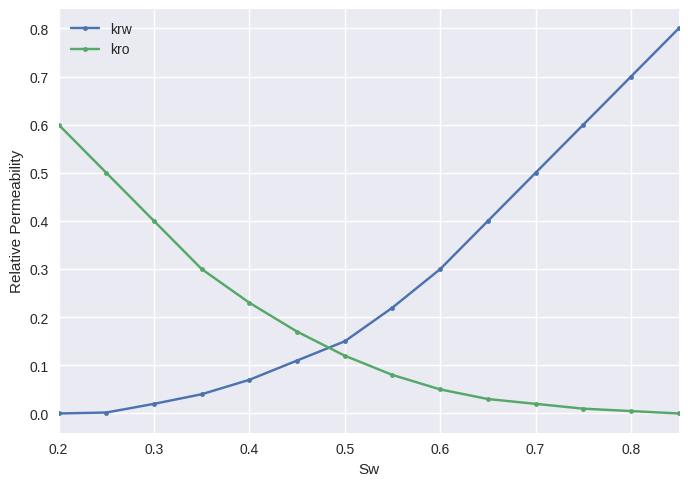

In [7]:
Sw = numpy.arange(0.2, 0.9, 0.05)
krw = numpy.array([0, .002, .02, .04, .07, .11, .15, .22, .3, .4, .5, .6, .7, .8])
kro = numpy.array([.6, .5, .4, .3, .23, .17, .12, .08, .05, .03, .02, .01, .005, 0])

df = pd.DataFrame({"Sw": Sw, "krw": krw, "kro": kro})
print(df)

pyplot.plot(Sw, krw, '.-', label='krw')
pyplot.plot(Sw, kro, '.-', label='kro')
pyplot.xlim(0.2, 0.85)
pyplot.xlabel('Sw'); pyplot.ylabel('Relative Permeability')

pyplot.legend()
pyplot.show()

Interpolate relative permeability data

In [8]:
# Test intepolated relperm for Sw=0.575
Sw_new = .575
krw_new, kro_new = interpolate_relperm(Sw, krw, kro, Sw_new)

print('At Sw={}, krw={} and kro={}'.format(Sw_new, krw_new, kro_new))

At Sw=0.575, krw=0.25827076696551754 and kro=0.06379291182871477


Initial condition

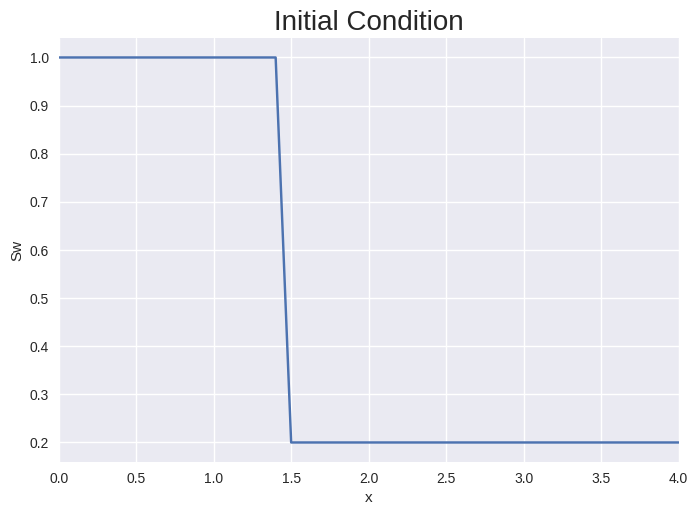

In [9]:
# set parameters for initial condition
L = 4
nx = 41

x = numpy.linspace(0.0, L, nx)
Sw0 = numpy.full(nx, 0.2)
Sw0[:15] = 1

pyplot.plot(x, Sw0)
pyplot.xlim(min(x), max(x))
pyplot.xlabel('x'); pyplot.ylabel('Sw')
pyplot.title('Initial Condition', size=20)

pyplot.show()

Run simulation

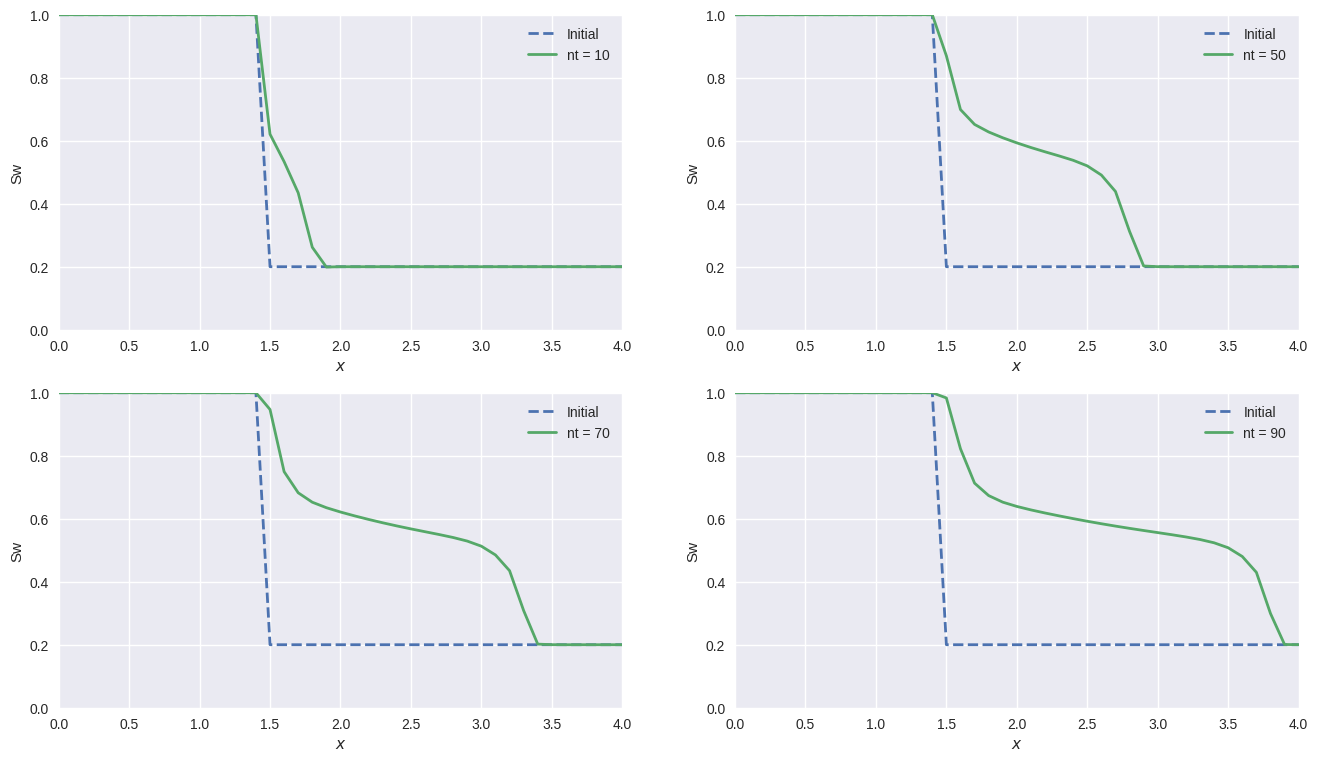

In [10]:
# Set parameters for simulation
nt = 70
L = 4
sigma = 0.1
bc_value = Sw0[0]
u_max = 1

muw = 0.5E-3
muo = 1E-3
q = 200 # m3/hr
A = 30 # m2
poro = 0.24

# Simulation
nt = [10, 50, 70, 90]

pyplot.figure(figsize=(16,9))
for i in range(4):
  pyplot.subplot(2,2,i+1)
  buckley_leverett1d(nt[i], Sw0, L, nx, sigma, bc_value, muw, muo, q, A, poro, Sw, krw, kro)